In [1]:
import os, sys
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sequentia import *

# Import utility functions and classes
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import *

# ggplot style
plt.style.use('ggplot')

In [2]:
fields = ['Rx', 'Ry', 'Rz', 'Tx', 'Ty', 'Tz']

In [3]:
# Load the MoCap dataset
loader = MoCapLoader(normalized=False)
X, y = loader.load(fields)

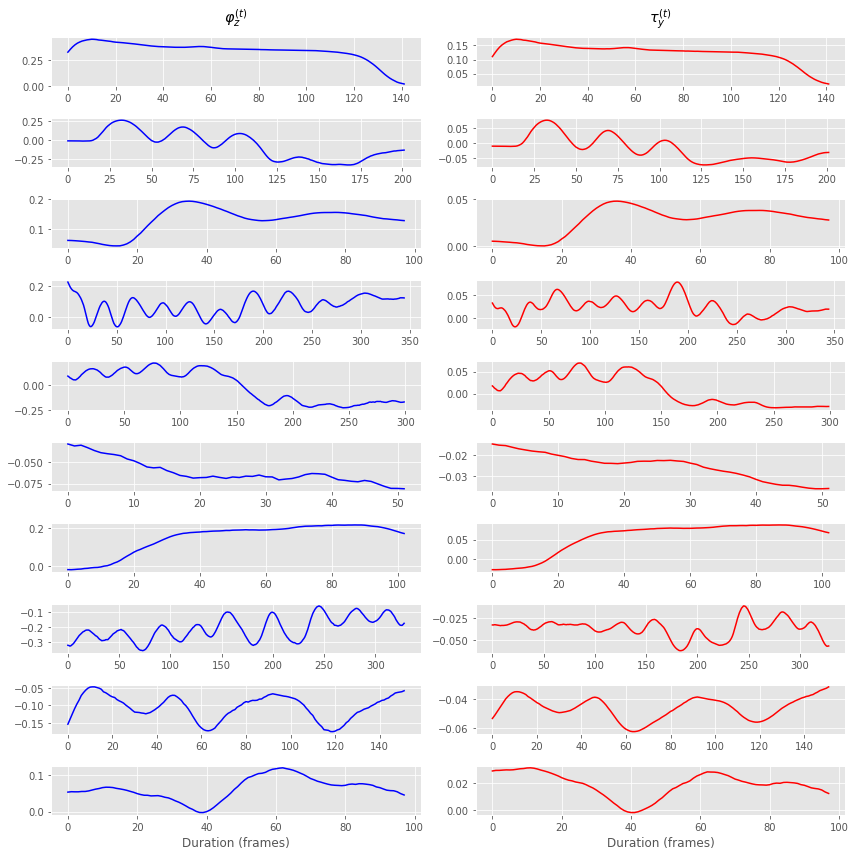

In [20]:
def plot_gesture():
    fig, axs = plt.subplots(10, 2, figsize=(12, 12))
    
    for i, ax in enumerate(axs.flat):
        if i % 2 == 0:
            gesture, label = X[i], y[i]
            ax.plot(gesture[:, 2], color='b')
        else:
            gesture = X[i-1]
            ax.plot(gesture[:, 4], color='r')
          
    axs.flat[0].set_title('$\\varphi^{(t)}_z$', pad=15)
    axs.flat[1].set_title('$\\tau^{(t)}_y$', pad=15)
    axs.flat[-1].set_xlabel('Duration (frames)')
    axs.flat[-2].set_xlabel('Duration (frames)')
        
    plt.tight_layout()
    plt.savefig('plots/gesture-correlations.pdf')
    plt.show()
    
plot_gesture()